# StatsModels Package's Logistic Regression

In [45]:
from sklearn.datasets import make_classification

X0, y  = make_classification(n_features = 1, n_redundant=0, n_informative = 1, n_clusters_per_class=1, random_state=4)
df = pd.DataFrame(X,y)
df

,0
0,-0.565113
1,1.812561
0,-1.336198
1,1.748906
0,-0.197026
...,...
0,-0.779362
0,-0.735322
0,-0.718436
0,-0.678874


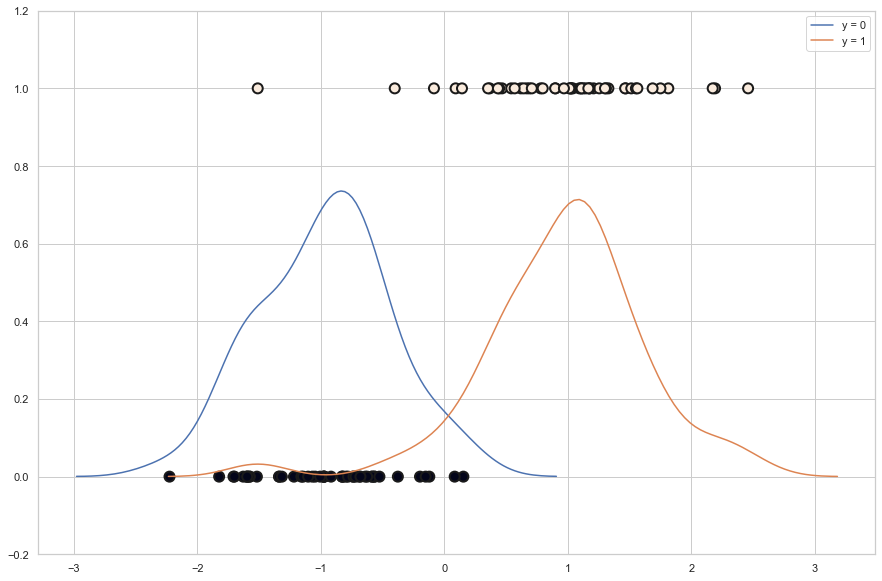

In [46]:
fig = plt.figure(figsize=(15,10))
plt.scatter(X, y, c=y, s=100, edgecolor="k", linewidth=2)
sns.distplot(X[y == 0, :], label="y = 0", hist = False)
sns.distplot(X[y == 1, :], label="y = 1", hist = False)
plt.ylim(-0.2, 1.2)


# fig = plt.figure(figsize = [20, 20])
# plt.rcParams['figure.figsize'] = [20, 20]
plt.show()
%matplotlib inline

# 분류문제에 따라 여러가지기준으로 분류가능 하지만
# 로지스틱에서는  LL(가능도) 을 최대화한다. 

### Logit Regression : formula use

In [52]:
X = sm.add_constant(X0)
logit_mod = sm.Logit.from_formula("y ~ X0", df)
# sm.OLS.from_formula("value ~ C(month) + 0", df_nottem)
logit_res = logit_mod.fit(disp=1) # 반복을 통한 수치적 최적화에 대한 내용을 보여주는 인수 
print(logit_res.summary())

Optimization terminated successfully.
         Current function value: 0.160844
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.7679
Time:                        14:15:43   Log-Likelihood:                -16.084
converged:                       True   LL-Null:                       -69.295
Covariance Type:            nonrobust   LLR p-value:                 5.963e-25
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2515      0.477      0.527      0.598      -0.683       1.186
X0             4.2382      0.

# 가장 크게 하고 싶은 Log-Likelihood:-16.084
# w0 0.2515, w1  4.2382

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    y ~ X0
        ^^

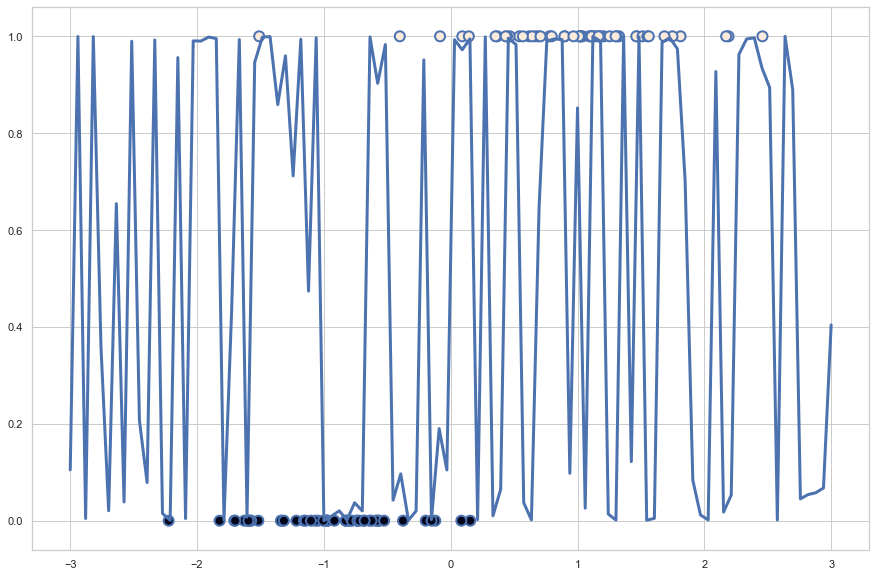

In [55]:
xx = np.linspace(-3, 3, 100)
fig = plt.figure(figsize=(15,10))
µ = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, µ, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor = "b", lw = 2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker="s", c=y, s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel("µ")
plt.title(r"$\hat{y}$")
plt.legent()
plt.show()

# ROC Curve를 그리기 위해 decistion Func. 이 필요한데 statsmodels 에서는 fitted values 를 제공한다. 이걸로 ROC를 그린다

In [58]:
# Logistic performance test

In [61]:
- 1/4 * np.log2(1/2) - 1/4 * np.log2(1/4) - 1/4 * np.log2(1/8) - 1/4 * np.log2(1/8) 

2.25

In [62]:
- 1/2 * np.log2(1/4) - 1/4 * np.log2(1/4) - 1/8 * np.log2(1/4) - 1/8 * np.log2(1/4) 

2.0

# eps = epsilon [ˈepsɪlɑːn]

# Entropy review

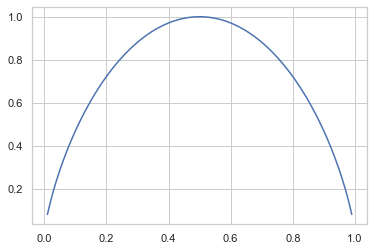

In [70]:
xx = np.linspace(0,1,100)
P = 1 - xx
H = - xx * np.log2(xx) - P * np.log2(P)

plt.plot(xx, H)

## $ G^2 $ 은 deviance(이탈도)는 교차엔트로피의 로그로스와 유사한 값이다. 예측이 정확하면 0 부정확할수록 큰값이 된다


In [80]:
# sklearn
from sklearn.linear_model import LogisticRegression

model_sk = LogisticRegression().fit(X0, y)

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

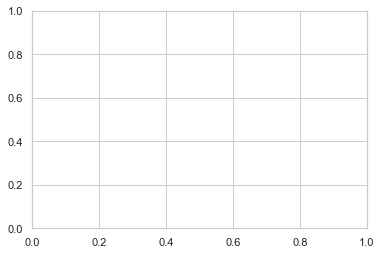

In [81]:
xx = np.linspace(-3, 3, 100)
µ = 1.0/(1 + np.exp(-model_sk.coef_[0][0]** - model_sk.intercept_[0]))
plt.plot(xx, µ)
plt.scatter(X0, y, c = y, s = 100, edgecolor = "k", lw = 2)
plt.scatter(X0, model_sk.pridect(X0), label=r"$hat{y}$)", marker='s', c=y, s=100, edgecolor="k", lw=1, alpha=0.5)
plt.xliim(-3, 3)
plt.ylabel("µ")
plt.xlabel(r"$hat{y}$)")
plt.legend()
plt.show()

In [82]:
xx = np.linspace(-3, 3, 100)
mu = logit_res.predict(sm.add_constant(xx))
plt.plot(xx, mu, lw=3)
plt.scatter(X0, y, c=y, s=100, edgecolor="k", lw=2)
plt.scatter(X0, logit_res.predict(X), label=r"$\hat{y}$", marker='s', c=y,
            s=100, edgecolor="k", lw=1)
plt.xlim(-3, 3)
plt.xlabel("x")
plt.ylabel(r"$\mu$")
plt.title(r"$\hat{y} = \mu(x)$")
plt.legend()
plt.show()

PatsyError: predict requires that you use a DataFrame when predicting from a model
that was created using the formula api.

The original error message returned by patsy is:
Error evaluating factor: IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
    y ~ X0
        ^^

# 연습문제 1

In [83]:
from sklearn.datasets import load_iris

In [110]:
iris = load_iris()# data load
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns = iris.feature_names) 
sp = pd.Series(iris.target) 
df['species'] = sp
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [111]:
df  =  df.rename(columns = {"sepal length (cm)": "sepal_length"})

df_st_vc = df[df.species.isin([0, 1])]
df_st_vc.head()

,sepal_length,sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [113]:
import statsmodels.api as sm

model = sm.Logit.from_formula("species ~ sepal_length", data = df_st_vc)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.5368
Time:                        17:00:18   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [123]:
-logit_res.params[0]/logit_res.params[1]

-0.05933347198987166

In [116]:
# 기준값
y_pred = result.predict(df_st_vc.sepal_length) >=0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df_st_vc.species, y_pred)

array([[45,  5],
       [ 6, 44]])

In [118]:
from sklearn.metrics import classification_report
print(classification_report(df_st_vc.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



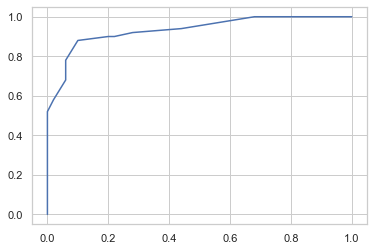

In [119]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df_st_vc.species, result.predict(df_st_vc.sepal_length))
plt.plot(fpr, tpr)
plt.show()

In [120]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

# 연습문제 2

<img scr = "ex2.png">

In [162]:
from sklearn.datasets import load_iris

In [163]:

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [164]:
df  =  df.rename(columns = {"sepal length (cm)": "sepal_length",
                           "sepal width (cm)": "sepal_width", 
                           "petal length (cm)": "petal_length", 
                           "petal width (cm)": "petal_width"})

df = df[df.species.isin([1, 2])]
df['species'] -= 1 # -1처리! 데이터상 1,2 숫자로 구분된것을 모델에 넣을때 0과 1로 넣어야 하기때문에 
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [166]:
import statsmodels.api as sm

model = sm.Logit.from_formula("species ~ sepal_length + sepal_width + petal_length+petal_width", data = df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.9142
Time:                        18:12:43   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465

In [167]:
-logit_res.params[0]/logit_res.params[1]

-0.05933347198987166

In [168]:
# 기준값
y_pred = result.predict(df1) >=0.5

from sklearn.metrics import confusion_matrix

confusion_matrix(df1.species, y_pred)

array([[49,  1],
       [ 1, 49]])

In [169]:
from sklearn.metrics import classification_report
print(classification_report(df1.species, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        50
           1       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



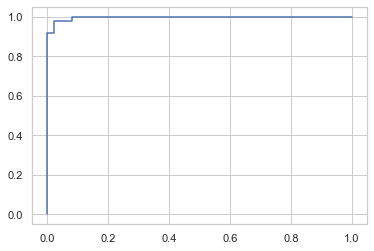

In [170]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(df1.species, result.predict(df1))
plt.plot(fpr, tpr)
plt.show()

In [171]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9972000000000001

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns=iris.feature_names)
dfy = pd.DataFrame(y, columns=["species"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
df = df[df.species.isin([1, 2])]
df["species"] -= 1
df = df.rename(
    columns={
        "sepal length (cm)": "sepal_length",
        "sepal width (cm)": "sepal_width",
        "petal length (cm)": "petal_length",
        "petal width (cm)": "petal_width",
    }
)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


In [1]:
import statsmodels.api as sm

model = sm.Logit.from_formula(
    "species ~ sepal_length + sepal_width + petal_length + petal_width", 
    data=df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.059493
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       95
Method:                           MLE   Df Model:                            4
Date:                Sun, 07 Jun 2020   Pseudo R-squ.:                  0.9142
Time:                        18:07:22   Log-Likelihood:                -5.9493
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 1.947e-26
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -42.6378     25.708     -1.659      0.097     -93.024       7.748
sepal_length    -2.465